Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy source, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the [UCI Electrical Grid Stability Simulated dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv).

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### EDA

In [3]:
grid = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

display(grid.head())

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
print(grid.stabf.value_counts(normalize = True))

print(grid.info())

unstable    0.638
stable      0.362
Name: stabf, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB
None


### Feature Selection, Scaling and splitting

In [5]:
x = grid.iloc[:, 0:-2]
y = grid.iloc[:, -1]

scale = StandardScaler().fit_transform(x)
le = LabelEncoder().fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, le, test_size = 0.2, random_state = 1)


### Random Forest Classifier

0.9215
{'fit_time': array([1.31650639, 1.33624554, 1.32066822, 1.33326483, 1.32716799]), 'score_time': array([0.029212  , 0.029176  , 0.02975011, 0.02915072, 0.03018546]), 'estimator': (RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min

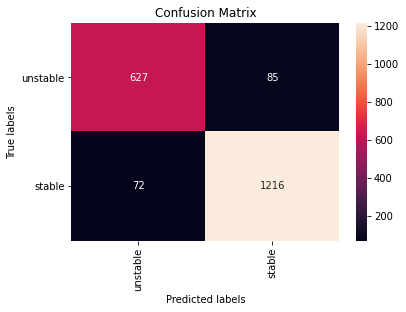

In [47]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

forest_predictions = forest.predict(x_test)

score = forest.score(x_test, y_test)
print(score)

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
forest_validate = cross_validate(forest, x_train, y_train, cv=cv, scoring='roc_auc', return_estimator = True, return_train_score = True)
print(forest_validate)
print('\nmean of test set CV scores using roc_auc: ', forest_validate['test_score'].mean() * 100)
## classification report
print(classification_report(y_test, forest_predictions))

## confusion matrix
forest_cm = confusion_matrix(y_test, forest_predictions)
forest_labels = y.unique()

ax= plt.subplot()
sns.heatmap(forest_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(forest_labels); 
ax.yaxis.set_ticklabels(forest_labels);

### ExtraTrees Classifier

0.9275
{'fit_time': array([0.50304103, 0.49598336, 0.48867631, 0.49500799, 0.48936629]), 'score_time': array([0.04129386, 0.03967977, 0.03934264, 0.03986025, 0.04047036]), 'estimator': (ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,


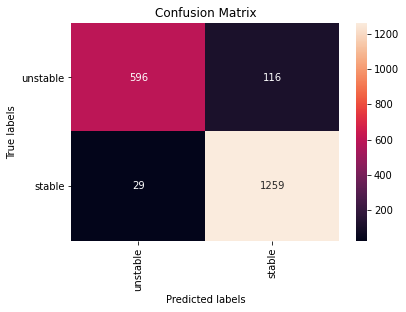

In [46]:
et = ExtraTreesClassifier()
et.fit(x_train, y_train)

et_predictions = et.predict(x_test)

score = et.score(x_test, y_test)
print(score)

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
et_validate = cross_validate(et, x_train, y_train, cv=cv, scoring='roc_auc', return_estimator = True, return_train_score = True)

print(et_validate)
print('\nmean of test set CV scores using roc_auc: ', et_validate['test_score'].mean() * 100)

## classification report
print('\n', classification_report(y_test, et_predictions))

## confusion matrix
et_cm = confusion_matrix(y_test, et_predictions)
et_labels = y.unique()

ax= plt.subplot()
sns.heatmap(et_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(et_labels); 
ax.yaxis.set_ticklabels(et_labels);



In [7]:
## Hyperparameter Tuning

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,

'min_samples_leaf': min_samples_leaf,

'min_samples_split': min_samples_split,

'max_features': max_features}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

search = RandomizedSearchCV(et, hyperparameter_grid, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(x_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.93025
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None}


### Extreme Gradient Boosting

{'fit_time': array([0.53011918, 0.52169728, 0.53282285, 0.53781343, 0.53941655]), 'score_time': array([0.00666738, 0.00657725, 0.00650144, 0.00705624, 0.00642872]), 'estimator': (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
     

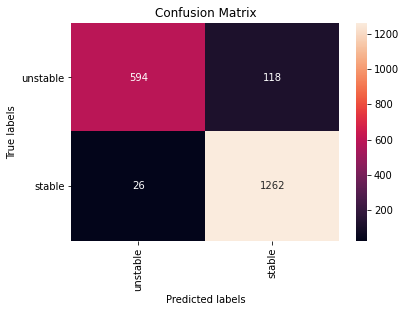

In [44]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

xgb_predictions = xgb_model.predict(x_test)

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
xgb_validate = cross_validate(xgb_model, x_train, y_train, cv=cv, scoring='roc_auc', return_estimator = True, return_train_score = True)

print(xgb_validate)
print('\nmean of test set CV scores using roc_auc: ', xgb_validate['test_score'].mean() * 100)

## classification report
print('\n', classification_report(y_test, xgb_predictions))

## confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)


ax= plt.subplot()
sns.heatmap(et_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(et_labels); 
ax.yaxis.set_ticklabels(et_labels);


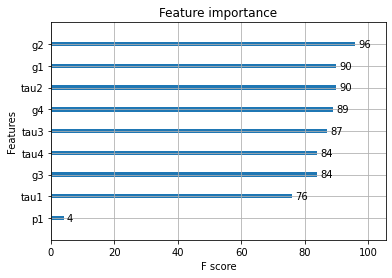

In [9]:
xgb.plot_importance(xgb_model)
plt.show()

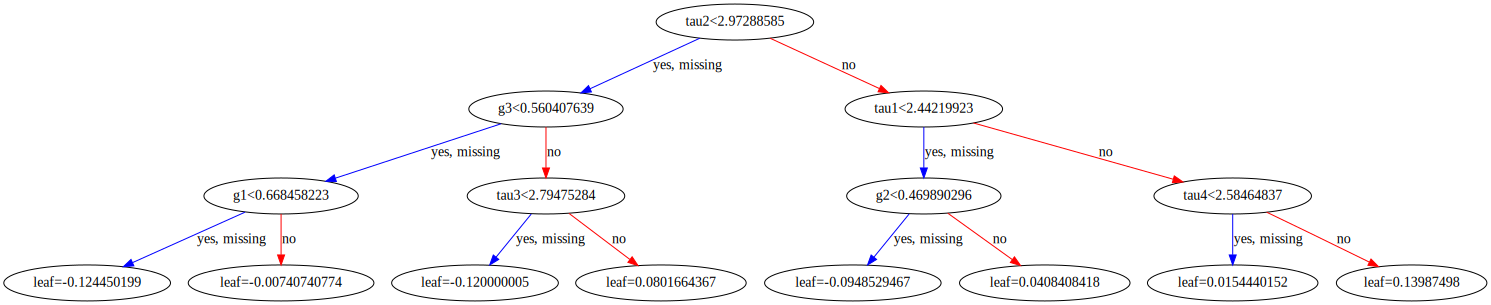

In [10]:
xgb.to_graphviz(xgb_model)

{'fit_time': array([0.31770396, 0.31653309, 0.31396699, 0.32035494, 0.31118655]), 'score_time': array([0.01324725, 0.01332378, 0.01346183, 0.01351285, 0.01327944]), 'estimator': (LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_l

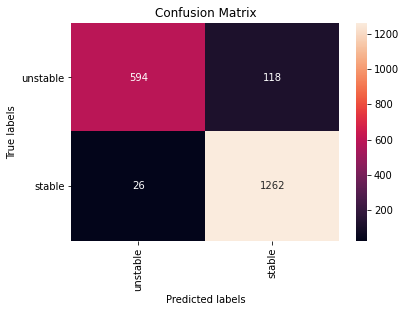

In [45]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier().fit(x_train, y_train)

lgb_predictions = lgb_model.predict(x_test)

# cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
lgb_validate = cross_validate(lgb_model, x_train, y_train, cv=cv, scoring='roc_auc', return_estimator = True, return_train_score = True)

print(lgb_validate)
print('\nmean of test set CV scores using roc_auc: ', lgb_validate['test_score'].mean() * 100)


## classification report
print('\n', classification_report(y_test, lgb_predictions))

## confusion matrix
lgb_cm = confusion_matrix(y_test, lgb_predictions)


ax= plt.subplot()
sns.heatmap(et_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(et_labels); 
ax.yaxis.set_ticklabels(et_labels);

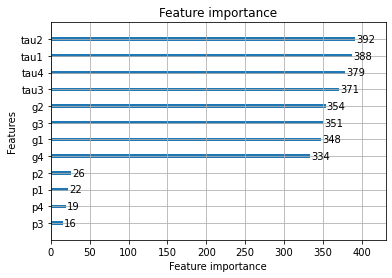

In [12]:
lgb.plot_importance(lgb_model)

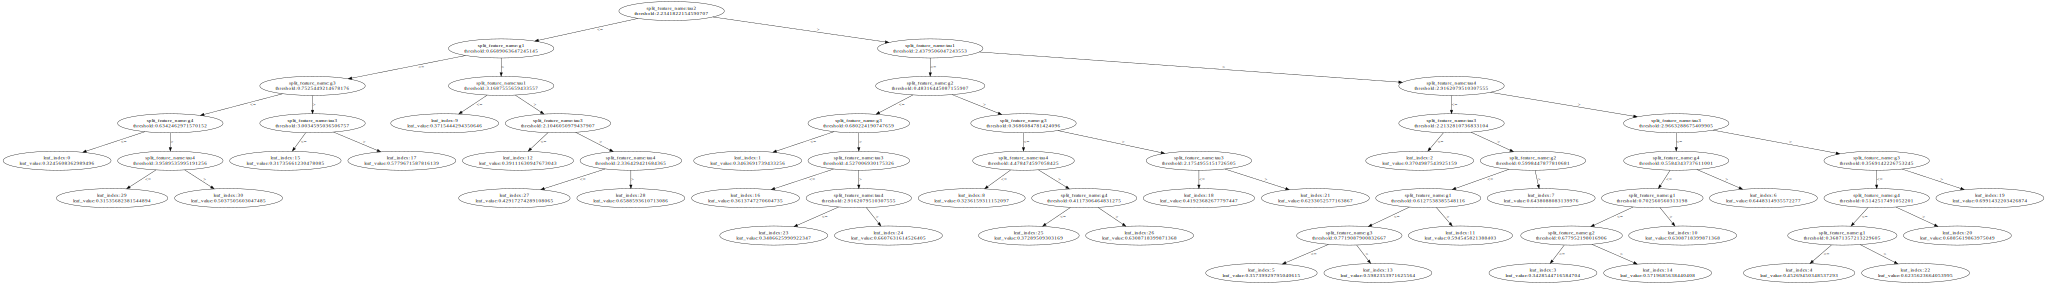

In [13]:
lgb.create_tree_digraph(lgb_model)


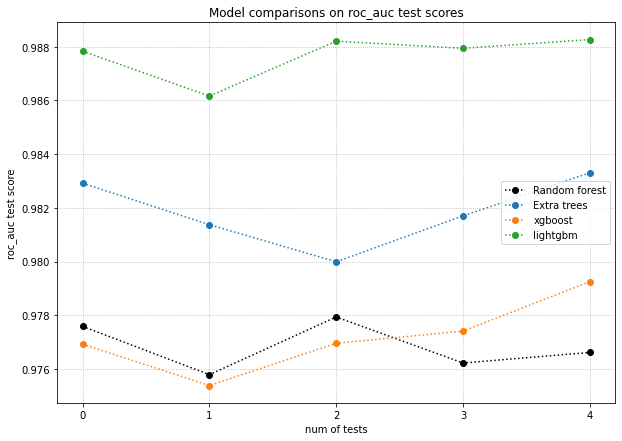

In [62]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
plt.plot(range(5), forest_validate['test_score'], c = 'k', marker = 'o', linestyle = ':')
plt.plot(range(5), et_validate['test_score'], marker = 'o', linestyle = ':')
plt.plot(range(5), xgb_validate['test_score'], marker = 'o', linestyle = ':')
plt.plot(range(5), lgb_validate['test_score'], marker = 'o', linestyle = ':')
plt.grid(linestyle = ':')
plt.legend(['Random forest', 'Extra trees', 'xgboost', 'lightgbm'])
plt.title('Model comparisons on roc_auc test scores')
plt.ylabel('roc_auc test score')
plt.xlabel('num of tests')
ax.set_xticks(range(5))
plt.show()

### Conclusion
From various models used, we see that lightgbm performed best with an accuracy score of 94%, followed by extratrees classifier at 93% and the xgboost at 92% and random forest at 92% on our test sets. It is ideal to note that all models were built without addition hyperparameter tuning except the extratrees model which had no significant change in accuracy score even after tuning. All models performed well on this dataset and thus, any of the models could be deployed for production.